In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Aim is to use "Machine learning to predict survival of patients with heart failure from serum creatinine and ejection fraction alone

 #### Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Exploring the dataset

##### let see the statistical summary of our dataset


In [3]:
# let first see the datatype of our columns using dtypes
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
# now let run the info method to see all non null count  of our dataframe along with data types of each row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().round(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,0.431,581.839,0.418,38.084,0.351,263358.029,1.394,136.625,0.649,0.321,130.261,0.321
std,11.895,0.496,970.288,0.494,11.835,0.478,97804.237,1.035,4.412,0.478,0.468,77.614,0.468
min,40.000,0.000,23.000,0.000,14.000,0.000,25100.000,0.500,113.000,0.000,0.000,4.000,0.000
25%,51.000,0.000,116.500,0.000,30.000,0.000,212500.000,0.900,134.000,0.000,0.000,73.000,0.000
50%,60.000,0.000,250.000,0.000,38.000,0.000,262000.000,1.100,137.000,1.000,0.000,115.000,0.000
75%,70.000,1.000,582.000,1.000,45.000,1.000,303500.000,1.400,140.000,1.000,1.000,203.000,1.000
max,95.000,1.000,7861.000,1.000,80.000,1.000,850000.000,9.400,148.000,1.000,1.000,285.000,1.000


##### let see the shape of our dataset

In [6]:
df.shape

(299, 13)

#### let have a have a look at the columns name

In [7]:
df.columns.to_list()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

#### now we can see that the death_event is capical letter so let change it to lowcase letter
we use the rename function
note we must use the inplace = True to change it from our original dataset 

In [8]:
df.rename(columns={'DEATH_EVENT':'target'}, inplace = True)

In [9]:
# Now let have a look at the target variable
df.target[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

##### Now let check if we have any missing values in our dataset

In [10]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

In [11]:
#sns.pairplot(df,hue = 'target')

In [12]:
# now let see how many elements we have in our target variable
df.target .nunique()

2

Text(0.5, 1.0, 'Target')

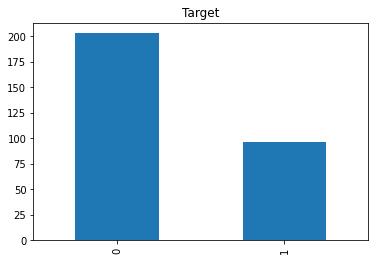

In [13]:
# let visualize the target variable to know more about it
df.target.value_counts().plot(kind = 'bar')
plt.title('Target')

###### from the above we can see that the number of death is more that the number of survived

In [14]:
# let look at the age columns 
print('The minimum age is :', df.age.min())
print("The avarage age is :", df.age.mean())
print('The maximum age is :',df.age.max())

The minimum age is : 40.0
The avarage age is : 60.83389297658862
The maximum age is : 95.0


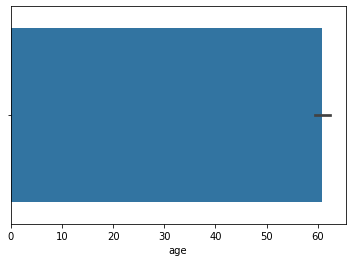

In [15]:
# now let visualize it
sns.barplot(df.age,hue = 'target',data=df)

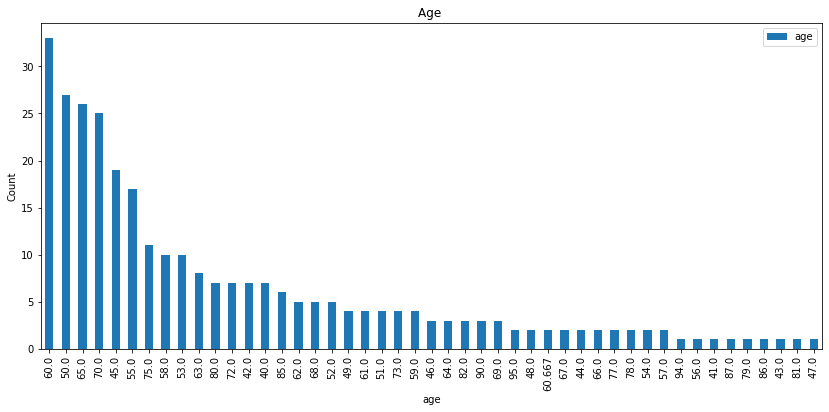

In [16]:
df.age.value_counts().plot(kind = 'bar', figsize = (14,6))
plt.title("Age ")
plt.xlabel("age")
plt.ylabel('Count')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Age')

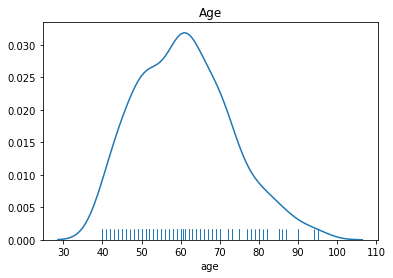

In [17]:
# let see the distribution plot of age 
sns.distplot(df['age'], bins = 30,rug =True, hist = False )
plt.title("Age")

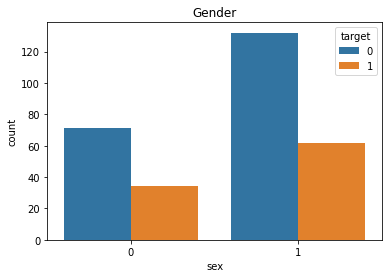

In [18]:
sns.countplot(df['sex'],hue ='target',data = df)
plt.title('Gender')
plt.show()

it shows that the number of male that didn't survived is very high as compare to female

Text(0.5, 1.0, 'Smoking or not')

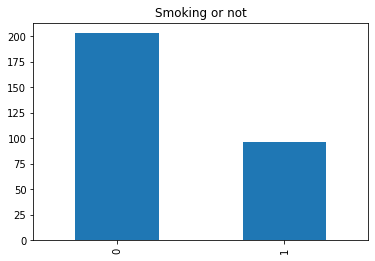

In [19]:
df.smoking.value_counts().plot(kind = 'bar')
plt.title('Smoking or not')

we see here that the number of people who smoke is more than those who don't smoke

Text(0.5, 1.0, 'Smoking with respect to sex')

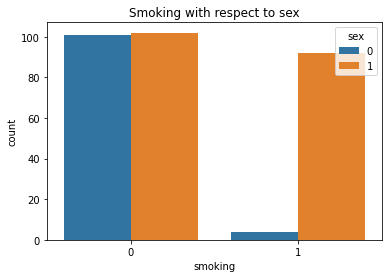

In [20]:
sns.countplot(df['smoking'],hue = 'sex',data = df)
plt.title("Smoking with respect to sex")

We can see from the above graph the number of female who smoke is very high butnot a big difference from male

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Feature selection

In [22]:
X = df.drop('target',axis =1)
y = df.target

In [23]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 20, random_state =0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [26]:
accuracy = logreg.score(X_test,y_test)
print('The accuracy of logistic regression is :', accuracy*100,'%')

The accuracy of logistic regression is : 85.0 %


In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  0],
       [ 3,  4]])

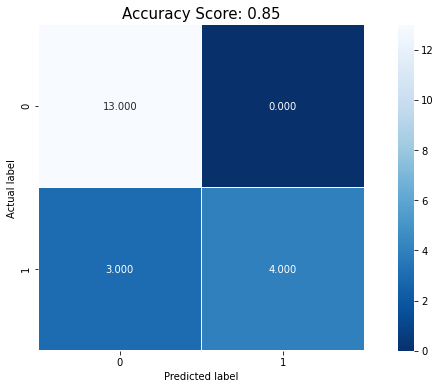

In [28]:
plt.figure(figsize = (12,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(sample_title, size = 15);

### The result is telling us that we have 13 + 4 correct predictions and 0 +3  incorrect predictions.

### classification report

In [29]:
cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20



The precision is the ratio P = tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio R = tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
F1-score = 2*(R * P)/R+P

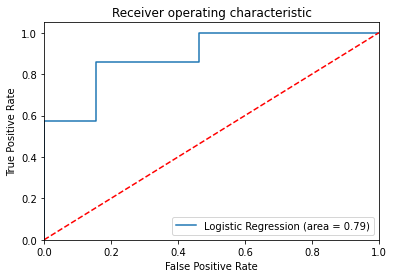

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random forest classifier

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.25,random_state = 1)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0])

#### Model evaluation

In [33]:
accuracy_rfc = rfc.score(X_test,y_test).round(3)
print("The accuracy of Random_forest calssifier is {}".format(accuracy_rfc))

The accuracy of Random_forest calssifier is 0.92


In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[53,  2],
       [ 4, 16]])

In [35]:
cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.89      0.80      0.84        20

    accuracy                           0.92        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75



In [36]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8818181818181818

In [37]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred)

In [38]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = 'orange',label='ROC')
    plt.plot([0,1],[0,1],color = 'darkblue',linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title("Receiver Operating Characteristic ' ROC' curve ")
    plt.show()

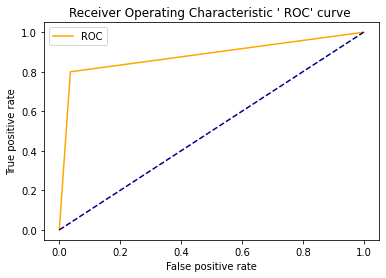

In [39]:
plot_roc_curve(fpr,tpr)

In [40]:
df_acu = pd.DataFrame({'LogisticRegression':accuracy,"RandomForestClassifier":accuracy_rfc},index = ['a','b'])
df_acu

,LogisticRegression,RandomForestClassifier
a,0.85,0.92
b,0.85,0.92


In [48]:
# from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)



In [49]:
NB.fit(X_train,y_train)
y_predNB = NB.predict(X_test)


In [64]:
# accuracy is
accuracyNB = NB.score(X_test,y_test)
accuracyNB

0.8533333333333334

In [65]:
cm = confusion_matrix(y_test,y_predNB)
print(cm)

[[54  1]
 [10 10]]


In [66]:
cr = classification_report(y_test,y_predNB)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        55
           1       0.91      0.50      0.65        20

    accuracy                           0.85        75
   macro avg       0.88      0.74      0.78        75
weighted avg       0.86      0.85      0.84        75



In [67]:
roc = roc_auc_score(y_test,y_predNB)
roc

0.7409090909090909

In [68]:
ftp,ptr,thresholds = roc_curve(y_test,y_predNB)

In [69]:
def plot_roc_curveNB(fpr,tpr):
    plt.plot(fpr,tpr,color = 'red',label='ROC')
    plt.plot([0,1],[0,1],color = 'darkblue',linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title("Receiver Operating Characteristic ' ROC' curve ")
    plt.show()

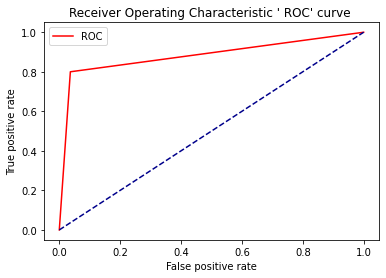

In [70]:
plot_roc_curveNB(fpr,tpr)

# conclusion 
we can see that here random forest classifier is preferable to solve this problem.

### made by: Abdoulaye Balde
https://twitter.com/abdoulayegk